<a href="https://colab.research.google.com/github/obeabi/SdsNovember2020Challenge/blob/main/Main_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #3 - Fraudulent Job Adverts
## 2021-01-22

### Using xgboost Classifier ALGORTHIM

## Problem Statement
Welcome Data Scientist to the 3rd SDS Club Monthly Challenge! In this month’s challenge you are helping your friend search for a job. Your friend has found thousands of job ads online and is trying to pick some to apply to. Your friends has heard that there are a lot of fraudulent job ads that are actually scams. Your mission is to help your friend by predicting whether a job is fraudulent based on the data provided.

In [145]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install imbalanced-learn
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [146]:
# Importing the dataset and check the shape and total number of missing values

df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

df_train.head()

,telecommuting,has_company_logo,has_questions,fraudulent,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1
4,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1


In [147]:
# print column names
print(df_train.columns)
print(df_train.shape)

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'department_ind', 'salary_range_ind', 'company_profile_ind',
       'description_ind', 'requirements_ind', 'benefits_ind',
       'employment_type_ind', 'required_experience_ind',
       'required_education_ind', 'industry_ind', 'function_ind'],
      dtype='object')
(14304, 15)


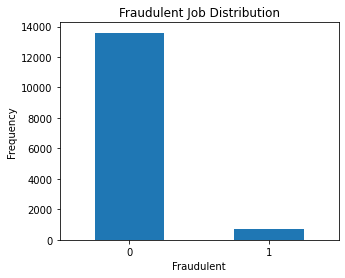

In [148]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_train['fraudulent'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Fraudulent Job Distribution")
plt.xticks(range(2))
plt.xlabel("Fraudulent")
plt.ylabel('Frequency')
plt.show()

In [149]:
# gET THE CANCELLED AND NOT CANCEELED FLIFGTS
Fraud = df_train[df_train['fraudulent']== 1]
notFraud = df_train[df_train['fraudulent']== 0]

print(Fraud.shape, notFraud.shape)

(709, 15) (13595, 15)


In [150]:
13595/709

19.174894217207335

In [151]:
# Extract features and target from train set dataframe
y = df_train.fraudulent.values.ravel()
X = df_train.drop(columns= ['fraudulent'], axis = 1)

X.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,1,0,1,0,0,1,1,1,1,1
4,0,1,0,1,1,1,1,1,1,1,1,1,1,1


In [152]:
# print first five rows target column
y[0:5]

array([0, 0, 0, 1, 0])

In [153]:
# Split data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Organize train set
X_train.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
144,0,1,0,0,0,1,1,1,1,1,1,1,1,1
2663,0,1,1,0,0,1,1,1,1,1,1,0,1,1
10005,0,0,1,1,0,0,1,1,0,0,0,0,0,0
13607,0,1,1,1,0,1,1,1,1,1,1,1,1,1
4894,0,0,1,0,0,1,1,1,0,1,1,0,1,1


### Model 1: Train Model Directly 

In [154]:
# Train Support Vector Classifier
class_weight=dict({0:1,1:19})

# Function for results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [155]:
# Train model
clf = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.1, 1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [10, 20, 50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


cv1 = GridSearchCV(clf, parameters, cv=5)
cv1.fit(X_train, y_train)

print_results(cv1)


BEST PARAMS: {'colsample_bytree': 0.7, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}

0.95 (+/-0.0) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 10, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.95 (+/-0.0) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.95 (+/-0.001) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.95 (+/-0.0) for {'colsample_bytree': 0.7, 'learning_rate': 0.1,

In [156]:
# Save best model
model_1 = cv1.best_estimator_
model_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)

In [157]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=model_1.predict(X_valid)
y_pred_proba = model_1.predict_proba(X_valid)
print( confusion_matrix(y_valid,y_pred))
print("The accuracy score is :", accuracy_score(y_valid,y_pred))
print( classification_report(y_valid,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid, model_1.predict_proba(X_valid)[:, 1]) )

[[2706   20]
 [ 100   35]]
The accuracy score is : 0.9580566235581964
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2726
           1       0.64      0.26      0.37       135

    accuracy                           0.96      2861
   macro avg       0.80      0.63      0.67      2861
weighted avg       0.95      0.96      0.95      2861

The roc_auc_score is : 0.8851933371375778


In [158]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_valid.reshape(len(y_valid),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Model 2: Random Oversampling

In [159]:
# Random Oversampling method
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_os,y_os=os.fit_sample(X, y)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_os)))

The number of classes before fit Counter({0: 10869, 1: 574})
The number of classes after fit Counter({0: 13595, 1: 10196})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [160]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_os, X_valid_os, y_train_os, y_valid_os = train_test_split(X_os, y_os,train_size=0.8, test_size=0.2, random_state=0)

# Train model
clf = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.1, 1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [10, 20, 50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


cv2 = GridSearchCV(clf, parameters, cv=5)
cv2.fit(X_train_os, y_train_os)

print_results(cv2)


BEST PARAMS: {'colsample_bytree': 0.7, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}

0.807 (+/-0.008) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 10, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.805 (+/-0.007) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.814 (+/-0.004) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.807 (+/-0.008) for {'colsample_bytree': 0.7, 'learning_r

In [161]:
# Save best model
model_2 = cv2.best_estimator_
model_2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)

In [162]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=model_2.predict(X_valid_os)
y_pred_proba = model_2.predict_proba(X_valid_os)
print( confusion_matrix(y_valid_os,y_pred))
print("The accuracy score is :", accuracy_score(y_valid_os,y_pred))
print( classification_report(y_valid_os,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid_os, model_2.predict_proba(X_valid_os)[:, 1]) )

[[2347  382]
 [ 346 1684]]
The accuracy score is : 0.84702668627863
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2729
           1       0.82      0.83      0.82      2030

    accuracy                           0.85      4759
   macro avg       0.84      0.84      0.84      4759
weighted avg       0.85      0.85      0.85      4759

The roc_auc_score is : 0.9269054147479996


In [163]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_valid_os.reshape(len(y_valid_os),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


### Model 3: SMOTEK

In [164]:
# Oversampling method 
# Class to perform over-sampling using SMOTE and cleaning using Tomek links.

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_sm,y_sm = smk.fit_sample(X,y)

# Inspect resampled dataset
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_sm))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 13595, 1: 709})
Resampled dataset shape Counter({0: 13595, 1: 13595})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [165]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(X_sm, y_sm,train_size=0.8, test_size=0.2, random_state=0)

# Train model
clf = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.1, 1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [10, 20, 50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


cv3 = GridSearchCV(clf, parameters, cv=5)
cv3.fit(X_train_sm, y_train_sm)

print_results(cv3)

BEST PARAMS: {'colsample_bytree': 0.7, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}

0.802 (+/-0.02) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 10, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.819 (+/-0.017) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.826 (+/-0.02) for {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.803 (+/-0.024) for {'colsample_bytree': 0.7, 'learning_rat

In [166]:
# Save best model
model_3 = cv3.best_estimator_
model_3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=50, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)

In [167]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=model_3.predict(X_valid_sm)
y_pred_proba = model_3.predict_proba(X_valid_sm)
print( confusion_matrix(y_valid_sm,y_pred))
print("The accuracy score is :", accuracy_score(y_valid_sm,y_pred))
print( classification_report(y_valid_sm,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid_sm, model_3.predict_proba(X_valid_sm)[:, 1]) )

[[2197  462]
 [ 323 2456]]
The accuracy score is : 0.8556454578889298
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2659
           1       0.84      0.88      0.86      2779

    accuracy                           0.86      5438
   macro avg       0.86      0.86      0.86      5438
weighted avg       0.86      0.86      0.86      5438

The roc_auc_score is : 0.934252839995231


### Save best xgboost Model


In [168]:
# Save model as a pickle file
import pickle
filename = 'xgboost.pickle'
pickle.dump(model_3, open(filename, 'wb'))

## Make prediction on test set with best model

In [169]:
# Best model was obtained with random over sampling method
column_names = X.columns
dataset_test = df_test[column_names]

dataset_test.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,0,1,1,1,1,1,1,0,1,0
1,0,1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,0,0,0,1,1,1,0,0,1,1,1,1,1
3,0,0,0,1,0,0,1,1,1,0,0,0,0,0
4,0,1,0,0,0,1,1,1,0,1,1,1,1,1


In [170]:
# Make prediction
X_test = dataset_test.values

loaded_model = pickle.load(open('xgboost.pickle', 'rb'))
y_hat = loaded_model.predict(X_test)
y_hat

array([0, 0, 0, ..., 1, 1, 0])

In [171]:
 # Save Numpy array to csv with custom header and footer
np.savetxt('xgboost_20210122.csv', y_hat, delimiter=',', fmt='%d' , header='Result:: Header', footer='This is footer')